# Generate scRNA-Seq data using scBoolSeq

Extends https://github.com/bnediction/scBoolSeq-supplementary/blob/main/synthetic%20scRNA-Seq%20from%20Random%20Network.ipynb

In [1]:
import mpbn
import bonesis
import booleantraces as btrace
from colomoto.minibn import *
import pandas as pd

### Load synthetic Boolean network and associated configurations

In [2]:
output_prefix = "../ground-truth/"
!mkdir -p {output_prefix}

# computing graph layout...


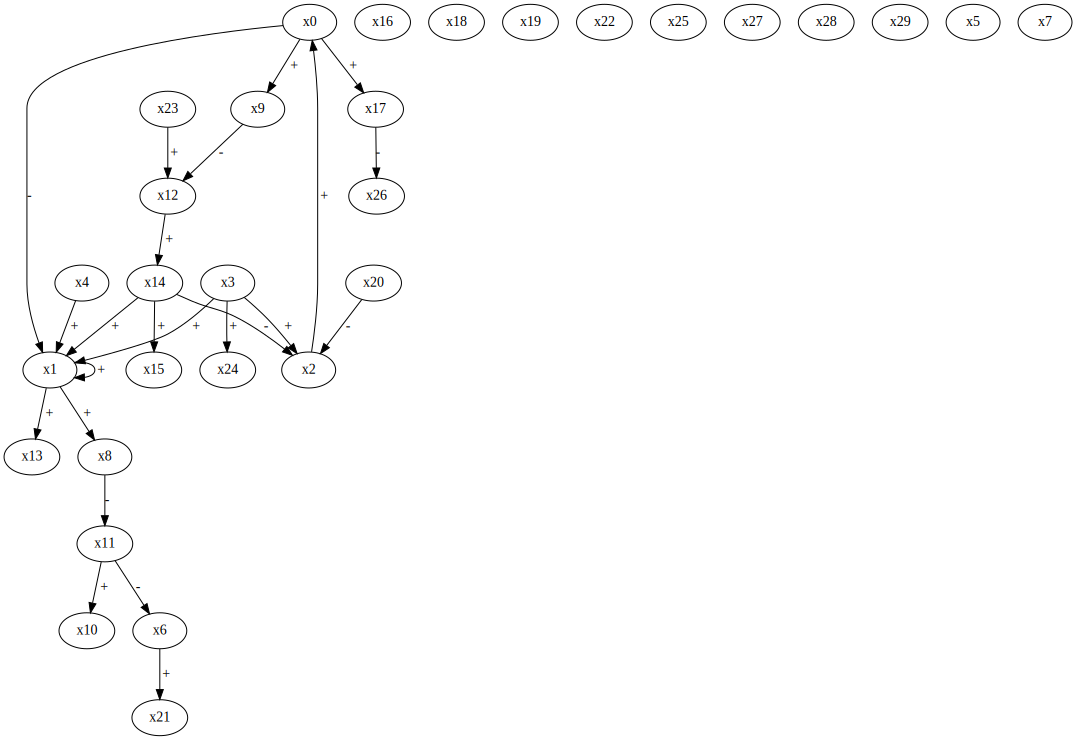

In [3]:
f = mpbn.load("boolean-network.bnet")
f_ig = f.influence_graph()
f_ig

# computing graph layout...


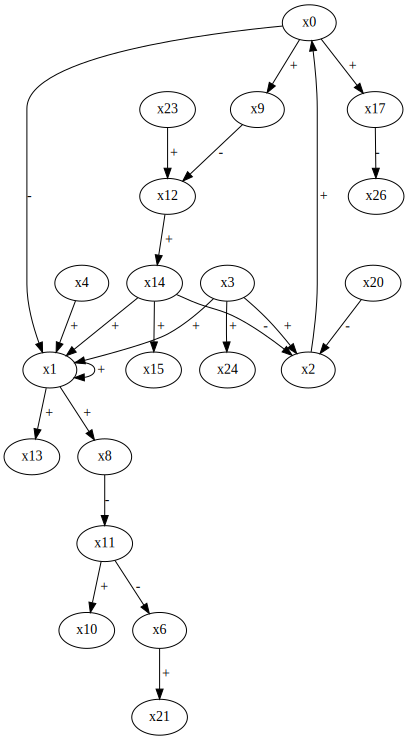

In [11]:
f = mpbn.load("boolean-network.bnet")
f_ig = f.influence_graph()
remove_nodes = ['x16','x18','x19','x22','x25','x27','x28','x29','x5','x7']

for node in remove_nodes:
    f_ig.remove_node(node)
f_ig

In [24]:
import boolsim
from colomoto.minibn import BooleanNetwork
from colomoto_jupyter import tabulate # for display

bn = BooleanNetwork.load("boolean-network.bnet")
a = boolsim.attractors(bn)
tabulate(a)

,x0,x1,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x2,x20,x21,x23,x24,x25,x26,x3,x4,x5,x6,x8,x9
2,0,0,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0
0,0,1,0,0,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,0,0,1,1,1,0
1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1


In [25]:
with open(output_prefix + "influence-graph.sif", "w") as fp:
    for a, b, d in f_ig.edges(data=True):
        print(a, "activates" if d["sign"] > 0 else "inhibits", b, file=fp)

In [26]:
confs = pd.read_csv("configurations.csv", index_col=0)
confs.head()
confs = confs.to_dict()

## Generation of Boolean trajectories

In [27]:
wt_pairs = [("init", "steady1"),
            ("init", "bifurcation"),
                ("bifurcation", "steady2"),
                ("bifurcation", "steady3")]
traj_df = pd.concat([btrace.labelled_trajectory(f, confs[a], confs[b], a, b) for (a,b) in wt_pairs])
traj_df = traj_df.drop_duplicates()
traj_df.shape

Grounding...done in 0.1s
Grounding...done in 0.0s
Grounding...done in 0.1s
Grounding...done in 0.1s


(52, 30)

In [28]:
traj_df

,x0,x1,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x2,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x3,x4,x5,x6,x7,x8,x9
init,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0
init_to_steady1_1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0
init_to_steady1_2,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0
init_to_steady1_3,1,0,1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0
init_to_steady1_4,1,0,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0
init_to_steady1_5,1,0,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0
init_to_steady1_6,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0
init_to_steady1_7,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,0,0,0
init_to_steady1_8,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0
init_to_steady1_9,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0


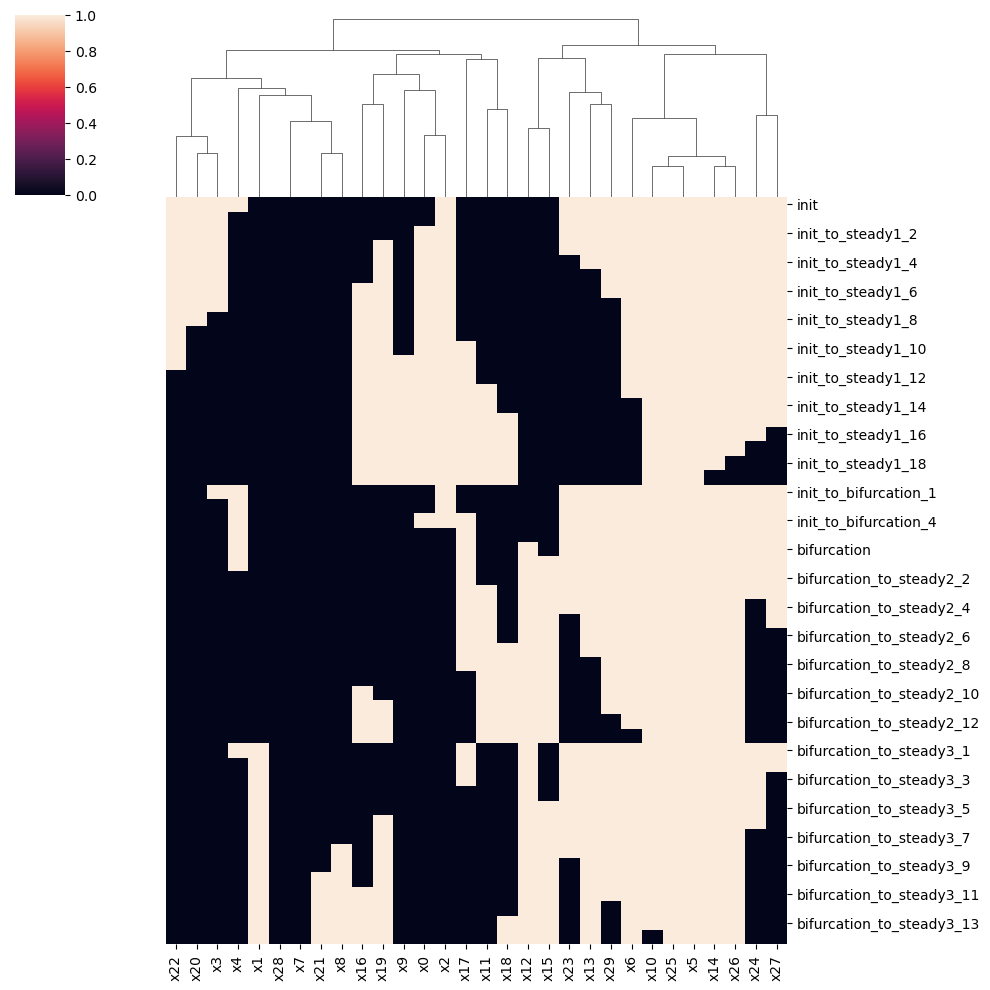

In [29]:
import seaborn as sns
sns.clustermap(traj_df, col_cluster=True, row_cluster=False, figsize=(10,10))

In [30]:
traj_df.to_csv(output_prefix + "wt-boolean-trajectories.csv")

In [31]:
data = traj_df.loc[['init','steady1','bifurcation','steady2','steady3']].to_dict(orient = 'index')

In [32]:
net = bonesis.InfluenceGraph.from_sif('../ground-truth/influence-graph.sif')

In [33]:
bo = bonesis.BoNesis(net,data)

In [41]:
bo.fixed(~bo.obs('steady1'));
bo.fixed(~bo.obs('steady2'));
bo.fixed(~bo.obs('steady3'));

# Add constraints
~bo.obs('init') >= ~bo.obs('steady1')
~bo.obs('init') >= ~bo.obs('bifurcation') >= ~bo.obs('steady2')
~bo.obs('init') >= ~bo.obs('bifurcation') >= ~bo.obs('steady3');

## Add universal constraints
bo.all_fixpoints({bo.obs(obs) for obs in ["steady1", "steady2", "steady3"]});
~bo.obs("init") >> "fixpoints" ^ {bo.obs(obs) for obs in ["steady1", "steady2", "steady3"]};

# Get the solutions
solutions = list(bo.boolean_networks(limit = 3000))

Grounding...done in 0.1s


In [42]:
len(solutions)

3000

In [37]:
import multiprocessing as mp
import time
from tqdm import tqdm

def write_solution_file(index, solution, previous):
    filename = f"bn_{index}.bnet"
    with open(filename, "w") as file:
        file.write(solution.source())
    previous.append(index)

def write_bn_files(solutions, num_processes = 15, project = "test"):
    # Multiprocessing arg
    manager=mp.Manager()
    previous=manager.list()
    processes=[]

    # Define path
    project_name = project
    os.mkdir(project_name)
    os.chdir(project_name)

    # For loop to write bnet files
    for i in tqdm(range(len(solutions))):
        solution = solutions[i]
        while len(previous)<i-(num_processes-1):
            time.sleep(1)
        p = mp.Process(target = write_solution_file, 
                        args = (i,solution,previous))
        p.start()
        processes.append(p)
    for process in processes:
        process.join()

In [39]:
os.chdir("/home/spankaew/Git/BooleanBenchmark/models/dev")
write_bn_files(solutions, num_processes=12, project = "synthetic_random_diff")

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:11<00:00, 90.42it/s]


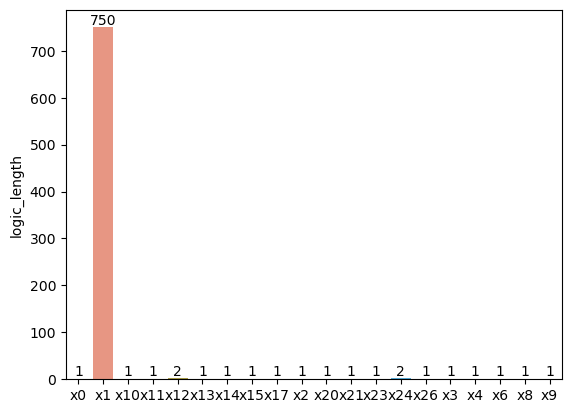

In [43]:
var_logic = pd.DataFrame(solutions)
var_logic_length = []
for i in var_logic.columns:
    num_logic = var_logic[i].value_counts().size
    var_logic_length.append(num_logic)
var_logic_length = pd.DataFrame(var_logic_length, columns = ['logic_length'], index = var_logic.columns)

import seaborn as sns
ax = sns.barplot(x = var_logic_length.index, 
            y = var_logic_length.logic_length)
ax.bar_label(ax.containers[0], fontsize=10);